<a href="https://colab.research.google.com/github/anmolsabharwal/Kaggle/blob/master/CI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [338]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
from google.colab import drive
import datetime
import plotly.figure_factory as ff

#pd.set_option('display.max_rows', None)


drive.mount('/content/drive')
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [339]:
ci = sqlite3.connect('/content/drive/My Drive/ARTG')
ci = pd.read_sql_query("SELECT * FROM cust_info",ci)
#gws1=pd.read_csv(io.StringIO(uploaded['gws.csv'].decode('utf-8')),sep=',')
ci.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


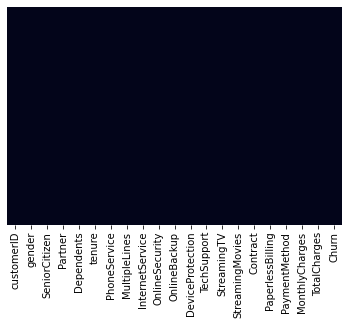

In [340]:
sns.heatmap(ci.isnull(),yticklabels=False,cbar=False)

In [341]:
ci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   object
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   object
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [342]:
ci.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,73,2,3,3,3,3,3,3,3,3,3,2,4,1585,6531,2
top,9018-PCIOK,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.05,,No
freq,1,3555,5901,3641,4933,613,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,61,11,5174


In [343]:
ci.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [344]:
ci=ci.astype({ 'gender': 'category', 'SeniorCitizen': 'int', 'Partner': 'str', 'Dependents': 'str',
       'tenure':int, 'PhoneService':'str', 'MultipleLines':'str', 'InternetService':'str',
       'OnlineSecurity':'str', 'OnlineBackup':'str', 'DeviceProtection':'str', 'TechSupport':'str',
       'StreamingTV':'str', 'StreamingMovies':'str', 'Contract':'str', 'PaperlessBilling':'str',
       'PaymentMethod':'str', 'MonthlyCharges':float,'Churn':'str'})

In [345]:
def goals(x):
  if x in "Yes":
    return 1
  else:
    return 0

In [346]:
ci['Partner']=ci['Partner'].apply(goals)
ci['Dependents']=ci['Dependents'].apply(goals)
ci['PhoneService']=ci['PhoneService'].apply(goals)
ci['MultipleLines']=ci['MultipleLines'].apply(goals)
ci['OnlineSecurity']=ci['OnlineSecurity'].apply(goals)
ci['OnlineBackup']=ci['OnlineBackup'].apply(goals)
ci['DeviceProtection']=ci['DeviceProtection'].apply(goals)
ci['TechSupport']=ci['TechSupport'].apply(goals)
ci['StreamingTV']=ci['StreamingTV'].apply(goals)
ci['StreamingMovies']=ci['StreamingMovies'].apply(goals)
ci['PaperlessBilling']=ci['PaperlessBilling'].apply(goals)
ci['Churn']=ci['Churn'].apply(goals)






In [347]:
ci.dtypes
#ci

customerID            object
gender              category
SeniorCitizen          int64
Partner                int64
Dependents             int64
tenure                 int64
PhoneService           int64
MultipleLines          int64
InternetService       object
OnlineSecurity         int64
OnlineBackup           int64
DeviceProtection       int64
TechSupport            int64
StreamingTV            int64
StreamingMovies        int64
Contract              object
PaperlessBilling       int64
PaymentMethod         object
MonthlyCharges       float64
TotalCharges          object
Churn                  int64
dtype: object

In [348]:
ci

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,1


In [349]:
home=pd.get_dummies(ci['gender'])
ci=pd.concat([ci,home],axis=1)
ci=ci.drop(['gender','Male'],axis=1)
ci.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female
0,7590-VHVEG,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1
1,5575-GNVDE,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0,0
2,3668-QPYBK,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,0
3,7795-CFOCW,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0
4,9237-HQITU,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1


In [350]:
internet=pd.get_dummies(ci['InternetService'])
ci=pd.concat([ci,internet],axis=1)
ci=ci.drop('InternetService',axis=1)
ci = ci.rename(columns={'No': 'Internet Service'})
#ci['Internet Service']=ci['Internet Service']-1


In [351]:
ci.head(50)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,DSL,Fiber optic,Internet Service
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,1,0,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0,0,1,0,0
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,0,1,0,0
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0,1,0,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,0,1,0
5,9305-CDSKC,0,0,0,8,1,1,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.5,1,1,0,1,0
6,1452-KIOVK,0,0,1,22,1,1,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.4,0,0,0,1,0
7,6713-OKOMC,0,0,0,10,0,0,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.9,0,1,1,0,0
8,7892-POOKP,0,1,0,28,1,1,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1,1,0,1,0
9,6388-TABGU,0,0,1,62,1,0,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0,0,1,0,0


Internet Service has a logic Problem

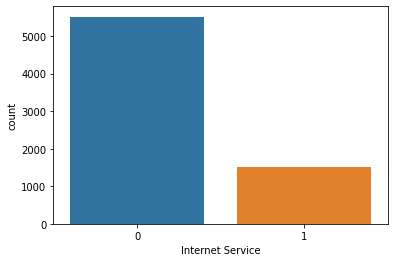

In [352]:
sns.countplot(ci['Internet Service'])

In [353]:
contract=pd.get_dummies(ci['Contract'])
ci=pd.concat([ci,contract],axis=1)
ci=ci.drop('Contract',axis=1)
ci.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female,DSL,Fiber optic,Internet Service,Month-to-month,One year,Two year
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,0,0,0,1,Electronic check,29.85,29.85,0,1,1,0,0,1,0,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,0,0,0,0,Mailed check,56.95,1889.5,0,0,1,0,0,0,1,0
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,0,0,0,1,Mailed check,53.85,108.15,1,0,1,0,0,1,0,0
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,1,0,0,0,Bank transfer (automatic),42.30,1840.75,0,0,1,0,0,0,1,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,0,1,Electronic check,70.70,151.65,1,1,0,1,0,1,0,0


In [354]:
payment=pd.get_dummies(ci['PaymentMethod'])
ci=pd.concat([ci,payment],axis=1)
ci=ci.drop('PaymentMethod',axis=1)
ci.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Female,DSL,Fiber optic,Internet Service,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.5,0,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,1,0,1,0,0,0,0,1,0


In [355]:
#filling blank cells
ci['TotalCharges'].replace('', np.nan, inplace= True)
ci

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Female,DSL,Fiber optic,Internet Service,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.5,0,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.5,0,0,1,0,0,0,1,0,0,0,0,1
7039,2234-XADUH,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.9,0,1,0,1,0,0,1,0,0,1,0,0
7040,4801-JZAZL,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,1,1,0,0,1,0,0,0,0,1,0
7041,8361-LTMKD,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.6,1,0,0,1,0,1,0,0,0,0,0,1


In [356]:
# Importing the SimpleImputer class 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,  
                        strategy ='mean') 
imputer = imputer.fit(ci['TotalCharges']) 


ValueError: ignored

In [ ]:
sns.countplot(ci['Partner'])

Missing Values. Remove Manually from excel.

In [ ]:
sns.countplot(ci['Churn'])

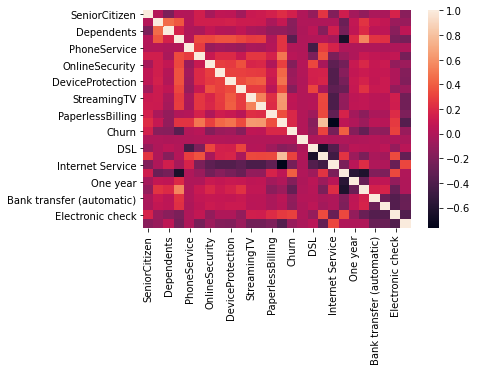

In [358]:
sns.heatmap(ci.corr())

In [362]:
ci.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn,Female,DSL,Fiber optic,Internet Service,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,0.156530,0.220173,0.150889,0.001874,-0.108322,0.255338,-0.182742,0.138360,-0.046262,-0.117000,-0.016159,-0.024135,0.171718,-0.153477
Partner,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,-0.014877,0.096848,-0.150448,0.001808,-0.000851,0.000304,0.000615,-0.280865,0.082783,0.248091,0.110706,0.082029,-0.083852,-0.095125
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,-0.111377,-0.113890,-0.164221,-0.010517,0.052010,-0.165818,0.139812,-0.231720,0.068368,0.204613,0.052021,0.060267,-0.150642,0.059071
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.006152,0.247900,-0.352229,-0.005106,0.013274,0.019720,-0.039062,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852
PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.016505,0.247398,0.011942,0.006488,-0.452425,0.289999,0.172209,-0.000742,-0.002791,0.003519,0.007556,-0.007721,0.003062,-0.003319
MultipleLines,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.163530,0.490434,0.040102,0.008414,-0.199920,0.366083,-0.210564,-0.088203,-0.003794,0.106253,0.075527,0.060048,0.083618,-0.227206
OnlineSecurity,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,-0.003636,0.296594,-0.171226,0.017021,0.321269,-0.030696,-0.333403,-0.246679,0.100162,0.191773,0.095158,0.115721,-0.112338,-0.080798
OnlineBackup,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.126735,0.441780,-0.082255,0.013773,0.157884,0.165651,-0.381593,-0.164172,0.083722,0.111400,0.087004,0.090785,-0.000408,-0.174164
DeviceProtection,0.059428,0.153786,0.013963,0.360653,-0.071227,0.201137,0.275438,0.303546,1.000000,0.333313,0.390874,0.402111,0.103797,0.482692,-0.066160,0.002105,0.146291,0.176049,-0.380754,-0.225662,0.102495,0.165096,0.083115,0.111554,-0.003351,-0.187373
TechSupport,-0.060625,0.119999,0.063268,0.324221,-0.096340,0.100571,0.354931,0.294233,0.333313,1.000000,0.278070,0.279358,0.037880,0.338304,-0.164674,0.009212,0.313118,-0.020492,-0.336298,-0.285241,0.095775,0.240824,0.101252,0.117272,-0.114839,-0.085509
